## Regresion Lineal: Costo de un incidente de Seguridad.

En este ejercicio se explican los fundamentos basicos de la regresion lineal, aplicada a un caso de uso sencillo relacionado con la Ciberseguridad.

## Enunciado del ejercicio.

El ejercicio consiste en predecir el costo de un incidente de seguridad en base al numero de equipos que se han visto afectados. El conjunto de datos es genrado de  manera aleatoria.

# 1.- Generacion del DataSet

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

print("La longitud del DataSet es: ", len(X))



La longitud del DataSet es:  100


# 2.- Visualizacion del DataSet

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

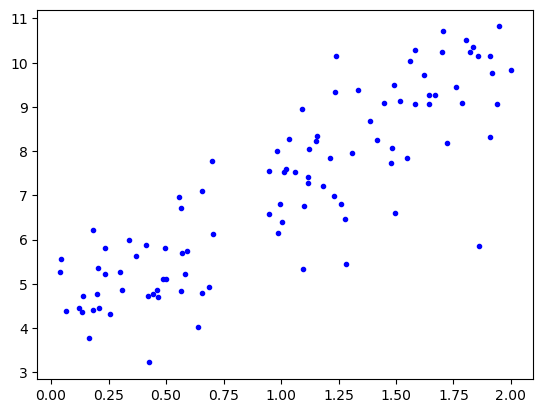

In [3]:
plt.plot(X, y, "b.")
plt.show()

<img src="http://localhost:5000/archivos/2.png">

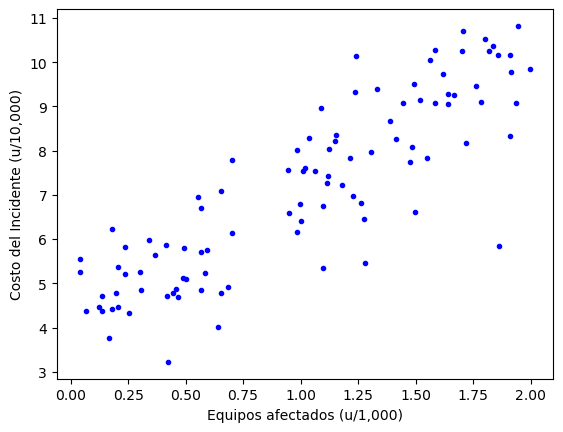

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("Equipos afectados (u/1,000)")
plt.ylabel("Costo del Incidente (u/10,000)")
plt.show()

<img src="http://localhost:5000/archivos/3.png">

# 3.- Modificacion del DataSet

In [5]:
import pandas as pd

In [6]:
data = {'No_Equipos_Afectados': X.flatten(), 'Costo': y.flatten()}
df = pd.DataFrame(data)
df.head(10)


,No_Equipos_Afectados,Costo
0,0.582806,5.229130
1,0.065415,4.381922
2,1.916079,9.776873
3,0.982418,8.013733
4,0.136421,4.363741
5,1.938731,9.074532
6,1.705963,10.709894
7,1.720735,8.174729
8,0.038725,5.264920
9,1.002876,6.398979


In [7]:
# Escalado del numero de equipos afcetados
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'] * 1000
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'].astype('int')
# Ecalado del Costo
df['Costo'] = df['Costo'] * 10000
df['Costo'] = df['Costo'].astype('int')
df.head(10)

,No_Equipos_Afectados,Costo
0,582,52291
1,65,43819
2,1916,97768
3,982,80137
4,136,43637
5,1938,90745
6,1705,107098
7,1720,81747
8,38,52649
9,1002,63989


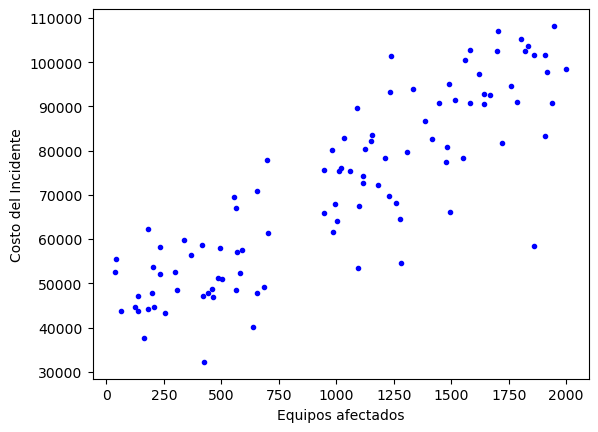

In [8]:
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Costo del Incidente")
plt.show()

<img src="http://localhost:5000/archivos/1.png">


# 4.- Construccion del Modelo.

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
# Construccion del modelo y ajuste de la funcion de hipotesis
lin_reg = LinearRegression()
lin_reg.fit(df['No_Equipos_Afectados'].values.reshape(-1, 1), df['Costo'].values)

LinearRegression()

<img src="http://localhost:5000/archivos/4.png">


In [11]:
# Parametro Tetha 0
lin_reg.intercept_

41583.976079264336

In [12]:
# Paramètro Tetha 1
lin_reg.coef_

array([29.55751188])

In [13]:
# Predicion para el valor minimo y maximo para el conjunto de datos de entrenamiento.
X_min_max = np.array([[df["No_Equipos_Afectados"].min()],[df["No_Equipos_Afectados"].max()]])
y_train_pred = lin_reg.predict(X_min_max)

<function matplotlib.pyplot.show(close=None, block=None)>

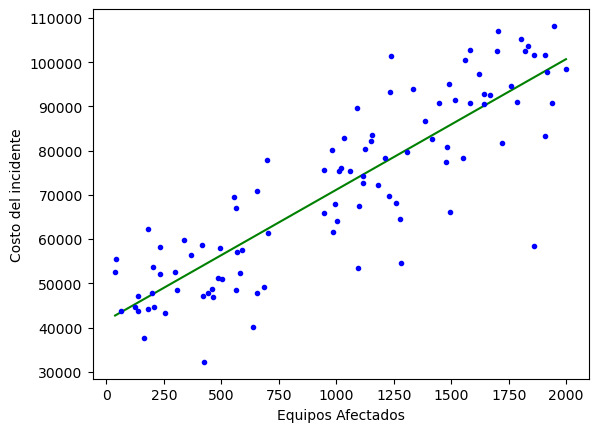

In [14]:
# Representacion grafica de la funcion de hipotesis generada
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del incidente")
plt.show

<img src="http://localhost:5000/archivos/5.png">


# 5.- Prediccion de nuevos ejemplos

In [15]:
x_new = np.array([[1300]]) # Numero de equipos afectados.
# Prediccion del costo que tendria el incidente.
Costo = lin_reg.predict(x_new) 
print("El costo del incidente seria: $", int(Costo[0]))

El costo del incidente seria: $ 80008


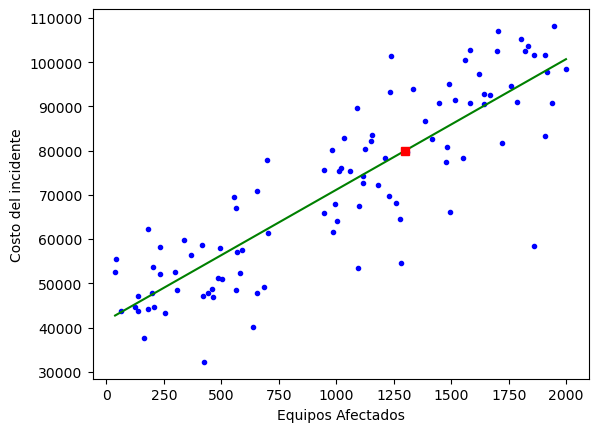

In [16]:
plt.plot(df["No_Equipos_Afectados"], df["Costo"], "b.")
plt.plot(X_min_max , y_train_pred, "g-")
plt.plot(x_new, Costo, "rs")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del incidente")
plt.show()

<img src="http://localhost:5000/archivos/6.png">
